<div class="alert alert-info">
    <strong>Importing Modules</strong>
</div>

In [1]:
from datetime import datetime, timedelta
import numpy as np
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
from lxml import html
import re
import matplotlib.pyplot as plt
from ipywidgets import interactive
import ipywidgets as widgets
import os
import seaborn as sns
from pmdarima import auto_arima
from sklearn.metrics import mean_squared_error, mean_absolute_error
import plotly.express as px
import plotly.graph_objects as go
from datetime import timedelta
import warnings
warnings.filterwarnings('ignore')

<div class="alert alert-info">
    <strong>1. Data Scrapping:  <a href="https://www.prnewswire.com/news-releases/news-releases-list">Data Source</a></strong>
</div>


In [2]:

count = 30

def create_urls():
    current_date = datetime.now()
    month = current_date.month
    date = current_date.day
    year = current_date.year

    urls = []

    for i in range(count):
        current_date = datetime(year, month, date) - timedelta(days=i)
        current_month = current_date.month
        current_day = current_date.day
        current_year = current_date.year
        website_url = f"https://www.prnewswire.com/news-releases/news-releases-list/?month={current_month}&day={current_day}&year={current_year}&hour=00"
        urls.append(website_url)

    return urls

seven_days_urls = create_urls()


for day, each_day_url in enumerate(seven_days_urls):
    day += 1

    with open('PageContent.txt', 'w', encoding='utf-8') as writer:
        writer.write('Page Url:'+ each_day_url + '/n')
        response = requests.get(each_day_url).text
        tree = html.fromstring(response)
        list_of_articles = tree.xpath('//*[@class="row newsCards"]')

        print(f"Scrapping for {day} out of {count} days, Day {day} has {len(list_of_articles)} articles")

        for article in list_of_articles:
            snippet = html.tostring(article)
            soup = BeautifulSoup(snippet, 'html.parser')

            full_news_page = soup.find('a', class_='newsreleaseconsolidatelink')
            href_value = full_news_page.get('href')
            parse_page_url = 'https://www.prnewswire.com'+ href_value
            news_content = requests.get(parse_page_url).text
            source = BeautifulSoup(news_content, 'html.parser')
            paragraphs = source.select('div.col-lg-10.col-lg-offset-1 p')

            for paragraph in paragraphs:
                writer.write(paragraph.get_text() + '\n')

            writer.write('____________________________________________________________________' + '/n')

Scrapping for 1 out of 30 days, Day 1 has 23 articles
Scrapping for 2 out of 30 days, Day 2 has 23 articles
Scrapping for 3 out of 30 days, Day 3 has 23 articles
Scrapping for 4 out of 30 days, Day 4 has 23 articles
Scrapping for 5 out of 30 days, Day 5 has 23 articles
Scrapping for 6 out of 30 days, Day 6 has 23 articles
Scrapping for 7 out of 30 days, Day 7 has 23 articles
Scrapping for 8 out of 30 days, Day 8 has 23 articles
Scrapping for 9 out of 30 days, Day 9 has 23 articles
Scrapping for 10 out of 30 days, Day 10 has 23 articles
Scrapping for 11 out of 30 days, Day 11 has 23 articles
Scrapping for 12 out of 30 days, Day 12 has 23 articles
Scrapping for 13 out of 30 days, Day 13 has 23 articles
Scrapping for 14 out of 30 days, Day 14 has 23 articles
Scrapping for 15 out of 30 days, Day 15 has 23 articles
Scrapping for 16 out of 30 days, Day 16 has 23 articles
Scrapping for 17 out of 30 days, Day 17 has 23 articles
Scrapping for 18 out of 30 days, Day 18 has 23 articles
Scrapping 

In [49]:
def find_ticker_symbols(text):
    pattern = r'(\([a-zA-Z]+:\s*[a-zA-Z]+\s*[0-9]*\))'
    matches = re.findall(pattern, text)
    return matches

file_path = 'PageContent.txt'
with open(file_path, 'r', encoding='utf-8') as file:
    file_content = file.read()

ticker_symbols = find_ticker_symbols(file_content)
symbols = list(set(ticker_symbols))



if ticker_symbols:
    print("Found ticker symbols:", symbols)
else:
    print("No ticker symbols found.")

Found ticker symbols: ['(NYSE: DG)', '(Nasdaq: IONS)', '(NYSE:\xa0BCS)', '(NYSE: PAYC)', '(NASDAQ: BOOM)', '(NYSE: GNRC)', '(NYSE: LUMN)', '(NYSE: HLLY)', '(NASDAQ: DCGO)', '(NYSE: SG)', '(NASDAQ:\xa0CGRN)', '(NASDAQ: AMLX)', '(NASDAQ: SCYX)', '(NASDAQ: DISH)', '(NASDAQ: ABNB)', '(NASDAQ: DMTK)']



<div class="alert alert-info">
    <strong>2. Retrieving Data (Web (API)) &  Data Visualization</strong>
</div>


In [50]:
ticker_list = []
for ticker in symbols:
    t_name = ticker.split(':')[1].strip()[:-1]
    #limiting the stock to count of 3 as per pdf from professor
    # if len(ticker_list)<3:
    ticker_list.append(t_name)

In [51]:
def dataFrame(symbol):
    try:
        df = yf.download(symbol, start='2023-10-01', end='2023-10-31')
        if df.empty:
            print(f"No data available for {symbol} in the specified date range.")
        else:
            df.to_csv(f'{symbol}.csv')
            print(f"Data downloaded successfully for Ticker:{symbol}, Stored in {os.getcwd()}")       
        return df
    except Exception as e:
        if "No price data found, symbol may be delisted" in str(e):
            print(f"The stock {ticker} may be delisted or has no price data in the specified date range.")
        else:
            print(f"Error downloading data: {e}")
        return None

In [52]:
# Saving Each ticker's Dataframe to directory
for col in ticker_list:
    dataFrame(col)

[*********************100%%**********************]  1 of 1 completed
Data downloaded successfully for Ticker:DG, Stored in c:\Users\d-kin\OneDrive\ClassWork\AIDI 1100\Assignments\Final_Project
[*********************100%%**********************]  1 of 1 completed
Data downloaded successfully for Ticker:IONS, Stored in c:\Users\d-kin\OneDrive\ClassWork\AIDI 1100\Assignments\Final_Project
[*********************100%%**********************]  1 of 1 completed
Data downloaded successfully for Ticker:BCS, Stored in c:\Users\d-kin\OneDrive\ClassWork\AIDI 1100\Assignments\Final_Project
[*********************100%%**********************]  1 of 1 completed
Data downloaded successfully for Ticker:PAYC, Stored in c:\Users\d-kin\OneDrive\ClassWork\AIDI 1100\Assignments\Final_Project
[*********************100%%**********************]  1 of 1 completed
Data downloaded successfully for Ticker:BOOM, Stored in c:\Users\d-kin\OneDrive\ClassWork\AIDI 1100\Assignments\Final_Project
[*********************100%%*


1 Failed download:
['CGRN']: Exception('%ticker%: No data found, symbol may be delisted')



No data available for CGRN in the specified date range.
[*********************100%%**********************]  1 of 1 completed
Data downloaded successfully for Ticker:AMLX, Stored in c:\Users\d-kin\OneDrive\ClassWork\AIDI 1100\Assignments\Final_Project
[*********************100%%**********************]  1 of 1 completed
Data downloaded successfully for Ticker:SCYX, Stored in c:\Users\d-kin\OneDrive\ClassWork\AIDI 1100\Assignments\Final_Project
[*********************100%%**********************]  1 of 1 completed
Data downloaded successfully for Ticker:DISH, Stored in c:\Users\d-kin\OneDrive\ClassWork\AIDI 1100\Assignments\Final_Project
[*********************100%%**********************]  1 of 1 completed
Data downloaded successfully for Ticker:ABNB, Stored in c:\Users\d-kin\OneDrive\ClassWork\AIDI 1100\Assignments\Final_Project
[*********************100%%**********************]  1 of 1 completed
Data downloaded successfully for Ticker:DMTK, Stored in c:\Users\d-kin\OneDrive\ClassWork\AIDI

In [53]:
def get_csv_files():
    return [f for f in os.listdir() if f.endswith(".csv")]


ticker_list = [f.split('.')[0] for f in get_csv_files()]

def plot_stock(symbol, line_style, plot_close, plot_volume):
    filename = f"{symbol}.csv"
    
    df = None
    if os.path.exists(filename):
        df = pd.read_csv(filename, parse_dates=True, index_col='Date')
        
        if not df.empty:
            if plot_close:
                plt.plot(df['Close'], label=f'{symbol} Close', linestyle=line_style)
            if plot_volume:
                plt.plot(df['Volume'], label=f'{symbol} Volume', linestyle=line_style)

            plt.title('Close Prices and Volume of Selected Companies')
            plt.xlabel('Date')
            plt.ylabel('Price ($)')
            plt.xticks(rotation=30) 
            plt.legend()
            plt.show()
        else:
            print(f"Empty DataFrame for {symbol}.")
    else:
        print(f"CSV file for {symbol} not found.")

symbol_dropdown = widgets.Dropdown(options=ticker_list, description='Ticker:')
line_style_dropdown = widgets.Dropdown(options=['solid', 'dashed', 'dashdot', 'dotted'], description='Line Style:')
plot_close_checkbox = widgets.Checkbox(value=True, description='Plot Close')
plot_volume_checkbox = widgets.Checkbox(value=True, description='Plot Volume')

interactive_plot = interactive(
    plot_stock,
    symbol=symbol_dropdown,
    line_style=line_style_dropdown,
    plot_close=plot_close_checkbox,
    plot_volume=plot_volume_checkbox
)

output = interactive_plot.children[-1]
output.layout.height = '500px'


interactive_plot


interactive(children=(Dropdown(description='Ticker:', options=('ABNB', 'AMLX', 'BCS', 'BOOM', 'DCGO', 'DG', 'D…

<div class="alert alert-info">
    <strong>3. Extra Mile & Optional Code (stocks worth purchasing or not)</strong>
</div>

In [54]:
#bringing closing values for all of the ticker 
# so we can predict best stock to purchase
directory_path =  os.getcwd()
csv_files = [file for file in os.listdir(directory_path) if file.endswith('.csv')]
close_df = pd.DataFrame()
for csv_file in csv_files:
    file_path = os.path.join(directory_path, csv_file)
    df = pd.read_csv(file_path)
    date = df['Date']
    close_column = df['Close']
    close_df[csv_file] = close_column

In [55]:
close_df.columns = [i.split('.csv')[0] for i in close_df.columns]

In [56]:
close_df.set_index(df['Date'], inplace=True)

In [57]:
close_df.to_csv('All_Ticker_Close_Price.csv')

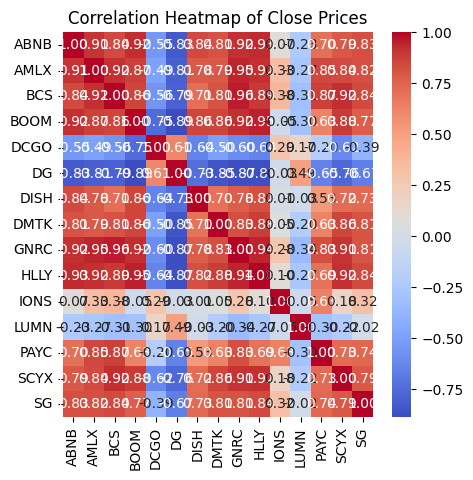

In [58]:
plt.figure(figsize=(5, 5))
sns.heatmap(close_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Close Prices')
plt.show()

In [59]:
close_df.head()

,ABNB,AMLX,BCS,BOOM,DCGO,DG,DISH,DMTK,GNRC,HLLY,IONS,LUMN,PAYC,SCYX,SG
Date,,,,,,,,,,,,,,,
2023-10-02,136.559998,18.120001,7.59,23.809999,5.33,103.779999,5.59,1.47,106.099998,4.93,43.430000,1.39,260.040009,2.18,11.86
2023-10-03,127.730003,17.910000,7.50,23.360001,5.13,105.589996,5.15,1.40,103.150002,4.80,43.389999,1.31,261.540009,2.24,10.83
2023-10-04,127.410004,17.480000,7.57,22.129999,5.76,107.029999,4.97,1.41,101.709999,4.81,43.669998,1.34,261.170013,2.22,11.33
2023-10-05,124.989998,17.770000,7.53,21.719999,5.80,106.379997,5.18,1.46,101.129997,4.74,46.849998,1.35,262.600006,2.24,11.32
2023-10-06,126.360001,17.330000,7.66,21.790001,6.00,103.669998,5.00,1.54,102.519997,4.76,46.389999,1.29,270.279999,2.24,11.60


<div class="alert alert-success">
    <strong>3.1. Suggesting Ticker Using Simple Maths</strong>
</div>

In [60]:
percentage_change = close_df.pct_change() * 100
threshold = 5
worth_purchasing = abs(percentage_change) > threshold

max_true_count = 0
max_true_column = None

for col in worth_purchasing.columns:
    value_counts = worth_purchasing[col].value_counts()
    
    if True in value_counts.index:
        true_count = value_counts[True]
        
        if true_count > max_true_count:
            max_true_count = true_count
            max_true_column = col

if max_true_column is not None:
    print(f"The column with the maximum number of True values is: '{max_true_column}' which may be worth purchasing")
else:
    print("No True values found in any column.")


The column with the maximum number of True values is: 'DMTK' which may be worth purchasing


<div class="alert alert-success">
    <strong>3.2 (Suggesting) Using Arima Model</strong>
</div>

In [61]:
for column in close_df.columns:
    fig = px.line(y=close_df[column], x=close_df.index)
    fig.update_layout(title_text='None',font=dict(size=12),
                     xaxis_title_text="Date", yaxis_title_text=column)
    fig.show()

In [62]:
model_train=close_df.iloc[:int(close_df.shape[0]*0.80)]
valid=close_df.iloc[int(close_df.shape[0]*0.80):]
y_pred=valid.copy()

In [63]:
y_pred

,ABNB,AMLX,BCS,BOOM,DCGO,DG,DISH,DMTK,GNRC,HLLY,IONS,LUMN,PAYC,SCYX,SG
Date,,,,,,,,,,,,,,,
2023-10-24,122.010002,16.980000,6.53,19.230000,6.75,116.540001,4.89,1.23,86.760002,4.38,46.279999,1.37,261.450012,1.655,10.90
2023-10-25,118.500000,16.110001,6.51,18.629999,6.59,119.470001,4.78,1.22,85.120003,4.22,44.369999,1.34,248.080002,1.730,10.15
2023-10-26,115.470001,15.950000,6.42,18.580000,6.12,120.940002,4.86,1.18,83.230003,4.29,45.630001,1.40,244.940002,1.710,10.19
2023-10-27,114.089996,15.740000,6.24,18.709999,6.01,119.320000,4.68,1.18,82.199997,4.20,44.049999,1.33,240.339996,1.700,10.25
2023-10-30,116.949997,15.755000,6.42,18.820000,6.01,119.930000,4.78,1.27,82.239998,4.27,44.000000,1.49,240.059998,1.730,10.70


In [64]:
for column in close_df.columns:
    model_arima= auto_arima(model_train[column],trace=True, error_action='ignore', start_p=1,start_q=1,max_p=5,max_q=5,
                  suppress_warnings=True,stepwise=False,seasonal=False)
    model_arima.fit(model_train[column])

 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=81.452, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=83.451, Time=0.07 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.32 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.55 sec
 ARIMA(0,1,4)(0,0,0)[0] intercept   : AIC=inf, Time=0.65 sec
 ARIMA(0,1,5)(0,0,0)[0] intercept   : AIC=inf, Time=0.65 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=83.451, Time=0.06 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.07 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.35 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.54 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=inf, Time=0.66 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=85.344, Time=0.07 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.25 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.46 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.60 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=82.657, Time=0.05 sec
 ARIMA(3,

In [65]:
for column in close_df.columns:
    prediction_arima=model_arima.predict(len(valid))
    y_pred["ARIMA Model Prediction"]=prediction_arima
    
    mse_arima= mean_squared_error(y_pred[column],y_pred["ARIMA Model Prediction"])
    rmse_arima=np.sqrt(mean_squared_error(y_pred[column],y_pred["ARIMA Model Prediction"]))
    mae_arima=mean_absolute_error(y_pred[column],y_pred["ARIMA Model Prediction"])
    print(len(prediction_arima))

5
5
5
5
5
5
5
5
5
5
5
5
5
5
5


In [66]:
model_scores_mse,model_scores_rmse,model_scores_mae = [],[],[]

In [67]:

model_scores_mse.append(mse_arima)
model_scores_rmse.append(rmse_arima)
model_scores_mae.append(mae_arima)


print("Mean Square Error ARIMA: ",mse_arima)
print("Root Mean Square Error ARIMA: ",rmse_arima)
print("Mean Absoulute Error ARIMA: ",mae_arima)

Mean Square Error ARIMA:  0.4374764405357359
Root Mean Square Error ARIMA:  0.661420018245393
Mean Absoulute Error ARIMA:  0.5874817889001239


In [68]:
for column in close_df.columns:
    fig=go.Figure()
    fig.add_trace(go.Scatter(x=model_train.index, y=model_train[column], mode='lines',name="Train Data for Stock Prices"))
    fig.add_trace(go.Scatter(x=valid.index, y=valid[column], mode='lines',name="Validation Data for Stock Prices",))
    fig.add_trace(go.Scatter(x=valid.index, y=y_pred["ARIMA Model Prediction"], mode='lines',name="Prediction for Stock Prices",))
    fig.update_layout(title="ARIMA",xaxis_title="Date",yaxis_title=column,legend=dict(x=0,y=1,traceorder="normal"),font=dict(size=12))
    fig.show()